<a href="https://colab.research.google.com/github/palayushi293/resNet_dog_cat_classi/blob/main/DOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout


In [2]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

In [3]:
!pip install -q kaggle

In [4]:
! mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
!kaggle datasets download -d chetankv/dogs-cats-images

Dataset URL: https://www.kaggle.com/datasets/chetankv/dogs-cats-images
License(s): CC0-1.0
100% 433M/435M [00:05<00:00, 118MB/s] 
100% 435M/435M [00:05<00:00, 83.3MB/s]


In [8]:
from zipfile import ZipFile
dataset = '/content/dogs-cats-images.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()

In [ ]:
train='dataset/train'
test='dataset/test'
val='dataset/val'

In [ ]:
cnn_model=Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))


cnn_model.add(Conv2D(64,3,3,input_shape=(64,64,3),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.add(Flatten())

cnn_model.add(Dense(units=128,activation='relu'))

cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import CSVLogger


In [ ]:
from livelossplot import PlotLosses


In [ ]:
!pip install keras
!pip install --upgrade tensorflow keras livelossplot


In [ ]:
!pip install image -c conda-forge liveloss

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


In [ ]:
from livelossplot import PlotLossesKeras
from tensorflow.keras.callbacks import CSVLogger

In [ ]:
csv_logger='log.csv'
Data_train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:

Data_test=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
training_set=Data_train.flow_from_directory('/content/dog vs cat/dataset/training_set' ,target_size=(64,64),batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
test_set=Data_train.flow_from_directory('/content/dog vs cat/dataset/test_set' ,target_size=(64,64),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
cnn_model.fit(
    training_set,
    steps_per_epoch=8,
    epochs=25,  # Corrected from 'epoch' to 'epochs'
    validation_data=test_set,
    validation_steps=20,
    callbacks=[PlotLossesKeras(), CSVLogger(csv_logger, append=False, separator=";")]  # Corrected 'seperator' to 'separator'
)


In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import os

# Upload the image file
uploaded = files.upload()

# Get the uploaded file's name
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")

# Load the image and resize it to the target size expected by your model
new = image.load_img(file_name, target_size=(64, 64))

plt.imshow(new)
new=image.img_to_array(new)
test_image=np.expand_dims(new,axis=0)
result=cnn_model.predict(test_image)

if result[0][0]==1:
  print('dog')
else:
  print('cat')

In [11]:
from tensorflow.keras.applications.resnet50 import  ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [15]:
model=ResNet50(weights='imagenet')

Saving cat.webp to cat (3).webp
Uploaded file: cat (3).webp


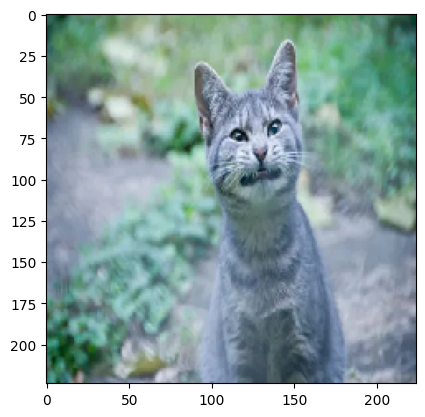

In [20]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import os
uploaded = files.upload()

# Get the uploaded file's name
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")

# Load the image and resize it to the target size expected by your model
img = image.load_img(file_name, target_size=(224, 224))

plt.imshow(img)
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [21]:
preds=model.predict(x)
print('Predicted:',decode_predictions(preds,top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n02124075', 'Egyptian_cat', 0.38776156), ('n02120505', 'grey_fox', 0.25481758), ('n02127052', 'lynx', 0.19223124)]
